<a href="https://colab.research.google.com/github/Nahom32/Regularization-Assignment/blob/main/injecting_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')

In [4]:
data.shape

(555719, 23)

In [5]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [6]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
print(data.columns)
print(data['gender'])


Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')
0         M
1         F
2         F
3         M
4         M
         ..
555714    M
555715    M
555716    F
555717    M
555718    M
Name: gender, Length: 555719, dtype: object


In [8]:
data['gender'] = data['gender'].map({"M":1, "F":0})
print(data['gender'])

0         1
1         0
2         0
3         1
4         1
         ..
555714    1
555715    1
555716    0
555717    1
555718    1
Name: gender, Length: 555719, dtype: int64


In [11]:
def clean_dataset(data_frame):
  """
    This function is expected to clean the data frame so that
    it has complete rows and no duplicates.
  """
  data_frame = data_frame.dropna()
  data_frame = data_frame.drop_duplicates()
  return data_frame

In [10]:
data = clean_dataset(data)
data.shape

(555719, 22)

##Graphical Visualizations

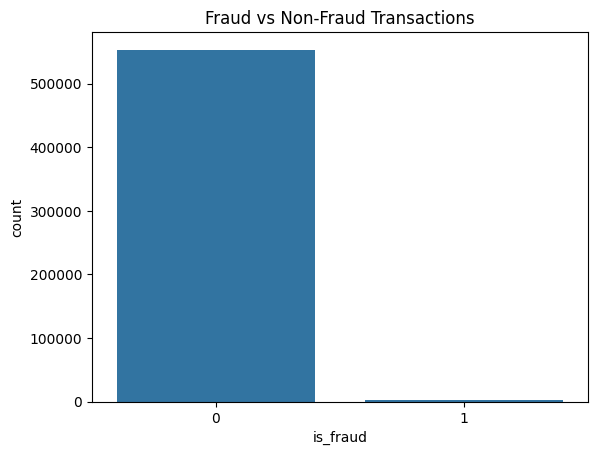

In [14]:
sns.countplot(x='is_fraud', data=data)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()


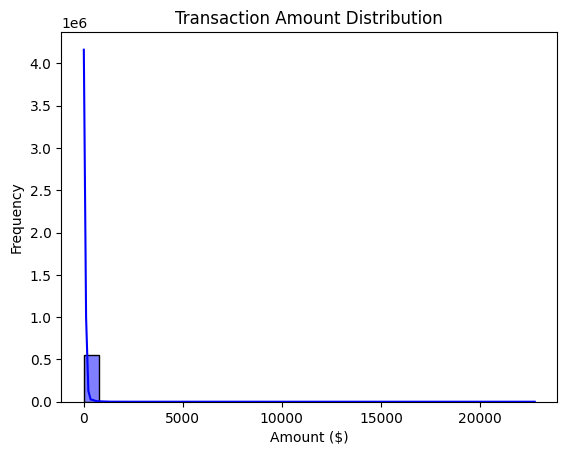

In [16]:
sns.histplot(data['amt'], bins=30, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()
